## PREPARAÇÃO DOS DADOS

In [29]:
# --- EXTRAÇÃO DO ARQUIVO ---

import pandas as pd

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json'
df = pd.read_json(url)

df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [30]:
# --- PADRONIZAÇÃO ----

# Padronizar nomes das colunas
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

if any(df.applymap(lambda x: isinstance(x, dict)).any()):
    df = pd.json_normalize(df.to_dict(orient="records"))

# Remover duplicados
df = df.drop_duplicates()

# Corrigir valores ausentes (mantendo NaN como padrão)
df = df.fillna(pd.NA)

# Remove possíveis caracteres não numéricos e converte para float
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Mostrar primeiras linhas após limpeza
df.head()


/tmp/ipython-input-314558956.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if any(df.applymap(lambda x: isinstance(x, dict)).any()):


,customerid,churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [31]:
# --- REMOÇÃO DE COLUNAS IRRELEVANTES ---

# Eliminar colunas que não trazem valor para análise/predição
cols_to_drop = [
    "customer_id",    # exemplo de ID único
    "account_id",
    "phone_number"
]

# Mantém apenas colunas que existem no dataframe
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns], errors="ignore")

# Conferir colunas finais
df.head()


,customerid,churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [32]:
# --- ENCODING ---

# Transformar variáveis categóricas em numéricas (One-Hot Encoding)
df_encoded = pd.get_dummies(df, drop_first=True)

# Conferir resultado
df_encoded.head()


,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,customerid_0003-MKNFE,customerid_0004-TLHLJ,customerid_0011-IGKFF,customerid_0013-EXCHZ,customerid_0013-MHZWF,customerid_0013-SMEOE,...,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,65.6,593.30,False,False,False,False,False,False,...,False,True,False,False,True,False,True,False,False,True
1,0,9,59.9,542.40,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.9,280.85,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
3,1,13,98.0,1237.85,False,False,True,False,False,False,...,False,True,False,True,False,False,True,False,True,False
4,1,3,83.9,267.40,False,False,False,True,False,False,...,False,True,False,False,False,False,True,False,False,True


In [33]:
# --- VERIFICAÇÃO DA PROPORÇÃO DE EVASÃO ---

# Verificar distribuição da variável target (churn)
if "churn" in df.columns:
    churn_counts = df["churn"].value_counts(normalize=True) * 100
    print("Distribuição de churn (%):\n", churn_counts)
else:
    print("Coluna 'churn' não encontrada. Verifique o nome correto da variável target.")


Distribuição de churn (%):
 churn
No     71.198569
Yes    25.719004
        3.082427
Name: proportion, dtype: float64


In [34]:
# --- BALANCEAMENTO DE CLASSES ---

from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd

# 1) Separar features (X) e target (y)
X = df.drop(["customerid", "churn"], axis=1)  # remove ID e target
y = df["churn"]

# 2) Garantir que o target esteja binário e sem NaN
y = y.map({'Yes': 1, 'No': 0})   # transforma em 0/1
y = y.fillna(0).astype(int)      # se houver NaN, preenche como 0 (ou poderia usar dropna())

# 3) Transformar variáveis categóricas em numéricas (One-Hot Encoding)
X_encoded = pd.get_dummies(X, drop_first=True)

# 4) Tratar valores ausentes em X
X_encoded = X_encoded.fillna(X_encoded.median(numeric_only=True))  # numéricas
X_encoded = X_encoded.fillna(0)  # garante que não sobrou nenhum NaN

# 5) Verificar distribuição original
print("Distribuição original:", Counter(y))

# 6) Aplicar balanceamento (SMOTE)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_encoded, y)

# 7) Verificar distribuição balanceada
print("Após SMOTE:", Counter(y_res))


Distribuição original: Counter({0: 5398, 1: 1869})
Após SMOTE: Counter({0: 5398, 1: 5398})


In [35]:
# --- NORMALIZAÇÃO/PADRONIZAÇÃO ---

from sklearn.preprocessing import StandardScaler

# Aplicar padronização apenas nas features numéricas
numeric_cols = X_encoded.select_dtypes(include=["int64", "float64"]).columns

scaler = StandardScaler()
X_scaled = X_encoded.copy()
X_scaled[numeric_cols] = scaler.fit_transform(X_encoded[numeric_cols])

X_scaled.head()


,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,phone.MultipleLines_No phone service,phone.MultipleLines_Yes,...,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,-0.440736,-0.950200,0.029206,-0.743701,False,True,True,True,False,False,...,False,True,False,False,True,False,True,False,False,True
1,-0.440736,-0.950200,-0.159990,-0.766154,True,False,False,True,False,True,...,False,False,False,True,False,False,False,False,False,True
2,-0.440736,-1.153700,0.304702,-0.881525,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
3,2.268932,-0.787401,1.104635,-0.459386,True,True,False,True,False,False,...,False,True,False,True,False,False,True,False,True,False
4,2.268932,-1.194400,0.636624,-0.887458,False,True,False,True,False,False,...,False,True,False,False,False,False,True,False,False,True


## CORRELAÇÃO E SELEÇÃO DE VARIÁVEIS

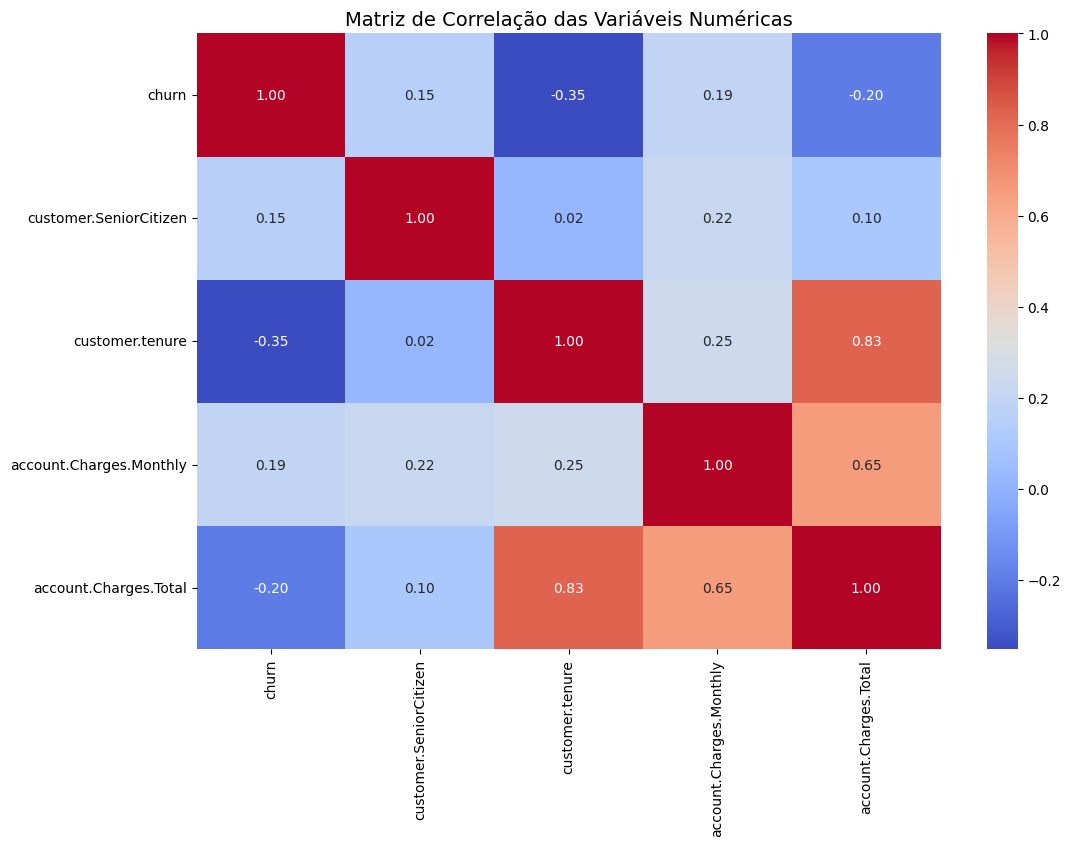


Top variáveis mais correlacionadas com churn:
churn                      1.000000
account.Charges.Monthly    0.193356
customer.SeniorCitizen     0.150889
account.Charges.Total     -0.199484
customer.tenure           -0.352229
Name: churn, dtype: float64


In [36]:
# --- ANÁLISE DE CORRELAÇÃO ---
import matplotlib.pyplot as plt
import seaborn as sns

# Converter a coluna churn para numérica (Yes=1, No=0)
df_corr = df.copy()
df_corr["churn"] = df_corr["churn"].map({"Yes": 1, "No": 0})

# Selecionar apenas colunas numéricas
numeric_df = df_corr.select_dtypes(include=["int64", "float64"])

# Calcular matriz de correlação
corr_matrix = numeric_df.corr()

# Plotar heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação das Variáveis Numéricas", fontsize=14)
plt.show()

# Mostrar variáveis mais correlacionadas com churn
print("\nTop variáveis mais correlacionadas com churn:")
print(corr_matrix["churn"].sort_values(ascending=False))


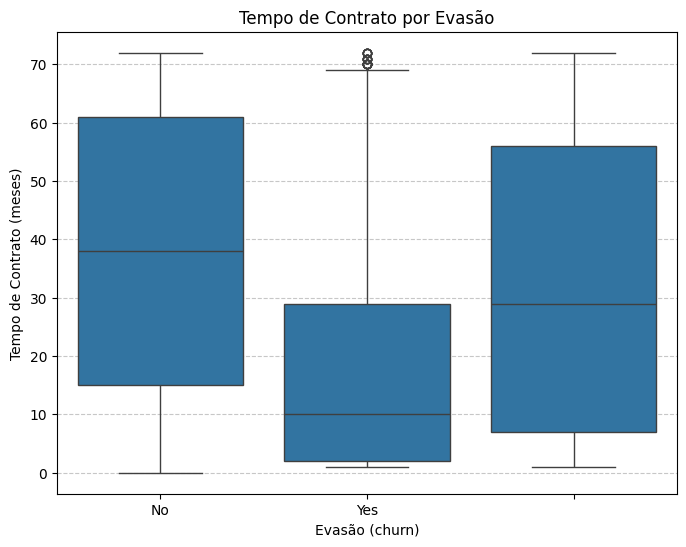

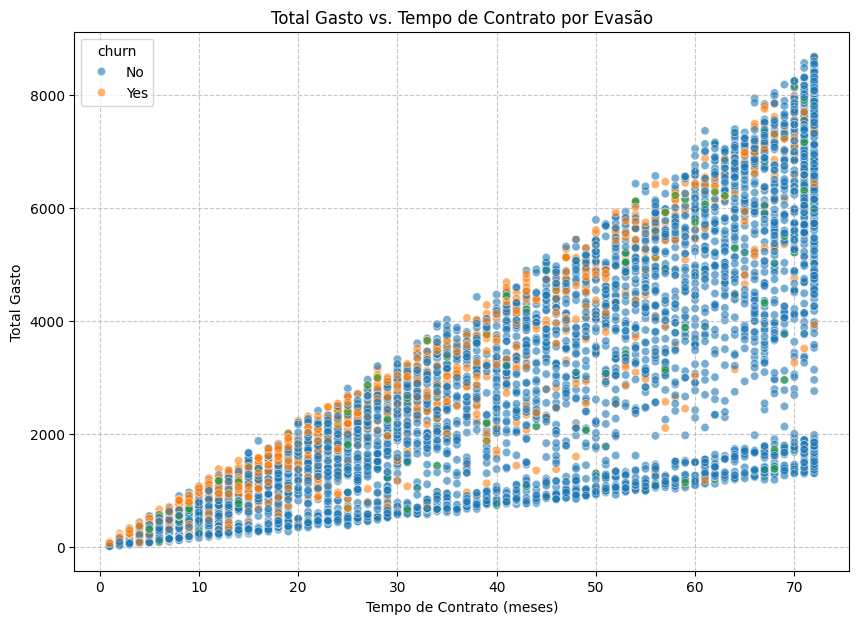

In [37]:
# --- ANÁLISES DIRECIONADAS ---
# 1. Boxplot: Tempo de contrato vs. Evasão
plt.figure(figsize=(8, 6))
sns.boxplot(x='churn', y='customer.tenure', data=df)
plt.title('Tempo de Contrato por Evasão')
plt.xlabel('Evasão (churn)')
plt.ylabel('Tempo de Contrato (meses)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Scatter Plot: Total Gasto) vs. Tempo de Contrato por Evasão (churn)
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='customer.tenure',
    y='account.Charges.Total',
    hue='churn',
    data=df,
    alpha=0.6
)
plt.title('Total Gasto vs. Tempo de Contrato por Evasão')
plt.xlabel('Tempo de Contrato (meses)')
plt.ylabel('Total Gasto')
plt.grid(linestyle='--', alpha=0.7)
plt.show()


## MODELAGEM PREDITIVA

In [38]:
# --- SEPARAÇÃO  DE DADOS ---
from sklearn.model_selection import train_test_split

# Divisão 70% treino e 30% teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,   # 30% para teste
    random_state=42, # fixa o resultado para reprodutibilidade
    stratify=y       # mantém a proporção das classes
)

print("Tamanho do conjunto de treino:", len(X_train))
print("Tamanho do conjunto de teste:", len(X_test))


Tamanho do conjunto de treino: 5086
Tamanho do conjunto de teste: 2181


In [39]:
# --- CRIAÇÃO DE MODELOS ---
from sklearn.model_selection import train_test_split

# 1) Separar features e target
X = df.drop(["customerid", "churn"], axis=1)
y = df["churn"]

# 2) Converter target para 0 e 1
y = y.map({"Yes": 1, "No": 0})

# 3) Remover ou preencher valores ausentes no target
y = y.fillna(0)   # ou y.dropna() se quiser descartar

# 4) One-Hot Encoding para as features
X_encoded = pd.get_dummies(X, drop_first=True)

# 5) Tratar valores ausentes nas features
X_encoded = X_encoded.fillna(X_encoded.median(numeric_only=True))
X_encoded = X_encoded.fillna(0)

# 6) Dividir treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42, stratify=y
)

# --- TREINAMENTO ---
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Criar pipelines para cada modelo
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=42))
])

rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=42))
])


modelos = {
    "Logistic Regression": lr_pipeline,
    "Random Forest": rf_pipeline,
    "KNN": knn_pipeline,
    "SVM": svm_pipeline
}

Escolhi quatro modelos diferentes para comparar desempenhos e identificar qual se ajusta melhor aos dados. A regressão logística é simples e eficiente para problemas de classificação binária, fornecendo interpretabilidade nos coeficientes. O Random Forest é um modelo baseado em ensemble que combina múltiplas árvores de decisão, sendo robusto a overfitting e capaz de capturar relações não lineares. O KNN classifica observações com base na proximidade de vizinhos, sendo sensível à escala dos dados, o que justifica a normalização. O SVM busca maximizar a margem entre classes e também é altamente influenciado pela escala das features. Por isso, apliquei StandardScaler em todos os pipelines para normalizar os dados, garantindo que cada feature contribua de forma equilibrada para os modelos que dependem de distâncias ou margens.



--- Resumo das métricas (ordenado por F1) ---


,modelo,acuracia,precisao,recall,f1
0,Logistic Regression,0.800550,0.634043,0.531194,0.578080
1,SVM,0.796882,0.638498,0.484848,0.551165
2,Random Forest,0.782669,0.597753,0.474153,0.528827
3,KNN,0.760660,0.539394,0.475936,0.505682



--- Modelo: Logistic Regression ---
              precision    recall  f1-score   support

           0     0.8463    0.8938    0.8694      1620
           1     0.6340    0.5312    0.5781       561

    accuracy                         0.8006      2181
   macro avg     0.7402    0.7125    0.7237      2181
weighted avg     0.7917    0.8006    0.7945      2181


--- Modelo: Random Forest ---
              precision    recall  f1-score   support

           0     0.8301    0.8895    0.8588      1620
           1     0.5978    0.4742    0.5288       561

    accuracy                         0.7827      2181
   macro avg     0.7139    0.6818    0.6938      2181
weighted avg     0.7703    0.7827    0.7739      2181


--- Modelo: KNN ---
              precision    recall  f1-score   support

           0     0.8256    0.8593    0.8421      1620
           1     0.5394    0.4759    0.5057       561

    accuracy                         0.7607      2181
   macro avg     0.6825    0.6676    0.

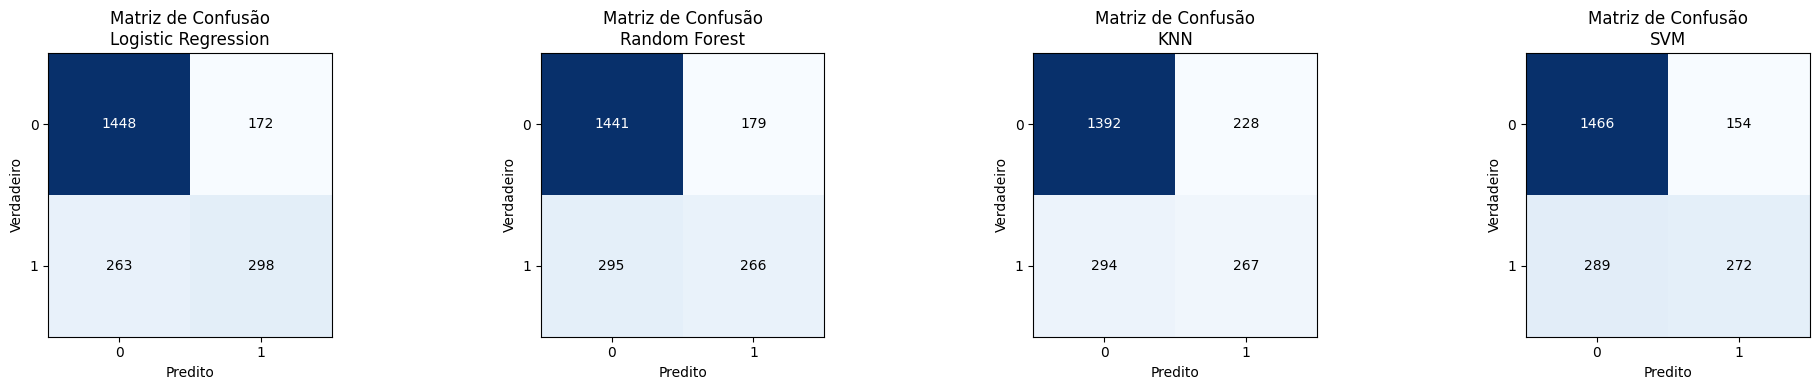


--- Análise crítica automática ---
Melhor F1-score: 0.5781 — Modelo: Logistic Regression
- Logistic Regression: Sem sinais fortes de over/underfitting (F1 treino 0.5844 ~ teste 0.5781).
- Random Forest: POSSÍVEL OVERFITTING (F1 treino 0.9847 >> teste 0.5288). Sugestões: reduzir complexidade, regularização, mais dados, validação cruzada.
- KNN: POSSÍVEL OVERFITTING (F1 treino 0.6618 >> teste 0.5057). Sugestões: reduzir complexidade, regularização, mais dados, validação cruzada.
- SVM: Sem sinais fortes de over/underfitting (F1 treino 0.5881 ~ teste 0.5512).


In [40]:
# --- AVALIAÇÃO DOS MODELOS ---
import inspect, types
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

# ---------- Helpers ----------
gl = globals()

def find_models():
    # 1) procura por dicionário 'modelos' / 'models'
    for name in ('modelos','models','trained_models','models_dict'):
        if name in gl and isinstance(gl[name], dict):
            return {str(k):v for k,v in gl[name].items()}
    # 2) procura por pares comuns
    pairs = [('modelo_lr','modelo_rf'), ('model_lr','model_rf'), ('clf_lr','clf_rf'), ('logreg','rf')]
    for a,b in pairs:
        if a in gl and b in gl:
            return {a:gl[a], b:gl[b]}
    # 3) pega qualquer objeto com método predict (até 4)
    cand = {}
    for name,obj in gl.items():
        if name.startswith('_'):
            continue
        if hasattr(obj, 'predict') and not isinstance(obj, (type, types.ModuleType, pd.DataFrame, pd.Series, Pipeline)): # Exclude Pipeline
            cand[name] = obj
        if len(cand)>=4:
            break
    if len(cand) >= 2:
        return {k:cand[k] for k in list(cand.keys())[:2]}
    return {}

def normalize_target_series(s):
    s_ser = pd.Series(s).copy()
    if pd.api.types.is_numeric_dtype(s_ser):
        return s_ser.astype(int)
    s2 = s_ser.astype(str).str.strip().str.lower()
    mapping = {'yes':1,'sim':1,'y':1,'true':1,'1':1,'no':0,'nao':0,'n':0,'false':0,'0':0}
    mapped = s2.map(mapping)
    if mapped.isnull().any():
        try:
            return pd.to_numeric(s_ser, errors='raise').astype(int)
        except:
            le = LabelEncoder()
            return pd.Series(le.fit_transform(s_ser), index=s_ser.index)
    return mapped.astype(int)

def find_X_y_split():
    if 'X_test' in gl and 'y_test' in gl:
        X_test = gl['X_test']; y_test = gl['y_test']
        X_train = gl.get('X_train', None); y_train = gl.get('y_train', None)
        return X_train, X_test, y_train, y_test, False

    if 'X' in gl and 'y' in gl:
        X = gl['X']; y = gl['y']
        y_bin = normalize_target_series(y)
        mask = y_bin.notna()
        Xf = X.loc[mask] if isinstance(X, (pd.DataFrame, pd.Series)) else X[mask]
        yb = y_bin.loc[mask]
        X_tr, X_te, y_tr, y_te = train_test_split(Xf, yb, test_size=0.30, random_state=42, stratify=yb)
        return X_tr, X_te, y_tr, y_te, True

    if 'df' in gl and isinstance(gl['df'], pd.DataFrame) and 'churn' in gl['df'].columns:
        df_local = gl['df'].copy()
        y_bin = normalize_target_series(df_local['churn'])
        mask = y_bin.notna()
        df_local = df_local.loc[mask]
        Xf = df_local.drop(columns=['churn'])
        yb = y_bin.loc[mask]
        X_tr, X_te, y_tr, y_te = train_test_split(Xf, yb, test_size=0.30, random_state=42, stratify=yb)
        return X_tr, X_te, y_tr, y_te, True

    raise RuntimeError("Não encontrou X_test/y_test nem X/y nem df['churn']. Defina uma dessas fontes antes de rodar esta célula.")

# ---------- Execução ----------
models = find_models()
if not models:
    raise RuntimeError(
        "Nenhum modelo detectado automaticamente. Crie um dict 'modelos' (ex: modelos = {'LR': lr_pipeline, 'RF': rf_pipeline})\n"
        "ou defina variáveis como 'modelo_lr' e 'modelo_rf', ou qualquer objeto com método .predict."
    )

# localizar dados de teste (pode criar split se necessário)
X_train, X_test, y_train, y_test, split_created = find_X_y_split()

# garantir séries numpy/pandas coerentes
y_test_bin = normalize_target_series(y_test)
if y_train is not None:
    y_train_bin = normalize_target_series(y_train)
else:
    y_train_bin = None

# evaluate each model
resultados = []
for name, mdl in models.items():
    try:
        # fit the model
        mdl.fit(X_train, y_train_bin)
        # predict
        y_pred = mdl.predict(X_test)
    except Exception as e:
        raise RuntimeError(f"Erro ao prever com o modelo '{name}': {e}")
    # normalizar y_pred caso necessário
    y_pred_ser = pd.Series(y_pred)
    # se y_test_bin é binário 0/1, convert y_pred to numeric ints if possible
    if not pd.api.types.is_numeric_dtype(y_pred_ser):
        try:
            y_pred_ser = normalize_target_series(y_pred_ser)
        except:
            pass

    y_pred_arr = np.array(y_pred_ser).astype(int)
    y_test_arr = np.array(y_test_bin).astype(int)

    acc = accuracy_score(y_test_arr, y_pred_arr)
    prec = precision_score(y_test_arr, y_pred_arr, zero_division=0)
    rec = recall_score(y_test_arr, y_pred_arr, zero_division=0)
    f1 = f1_score(y_test_arr, y_pred_arr, zero_division=0)
    cm = confusion_matrix(y_test_arr, y_pred_arr)
    report = classification_report(y_test_arr, y_pred_arr, zero_division=0, digits=4)
    resultados.append({'modelo': name, 'acuracia': acc, 'precisao': prec, 'recall': rec, 'f1': f1, 'cm': cm, 'report': report, 'estimator': mdl})

# tabela resumida
res_df = pd.DataFrame([{k:v for k,v in r.items() if k not in ('cm','report','estimator')} for r in resultados])
res_df = res_df.sort_values('f1', ascending=False).reset_index(drop=True)
print("\n--- Resumo das métricas (ordenado por F1) ---")
display(res_df)

# imprimir relatórios detalhados e plotar matrizes de confusão
n = len(resultados)
fig, axes = plt.subplots(1, n, figsize=(5*n,4))
if n==1:
    axes = [axes]
for ax, r in zip(axes, resultados):
    print(f"\n--- Modelo: {r['modelo']} ---")
    print(r['report'])
    cm = r['cm']
    ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title(f"Matriz de Confusão\n{r['modelo']}")
    ax.set_xlabel('Predito')
    ax.set_ylabel('Verdadeiro')
    # ticks
    ax.set_xticks([0,1]); ax.set_yticks([0,1])
    for (i,j), val in np.ndenumerate(cm):
        ax.text(j, i, int(val), ha='center', va='center', color='white' if cm.max()>10 and cm[i,j]>cm.max()/2 else 'black')
plt.tight_layout()
plt.show()

# ---------- Análise crítica automatizada ----------
print("\n--- Análise crítica automática ---")
best = max(resultados, key=lambda d: d['f1'])
print(f"Melhor F1-score: {best['f1']:.4f} — Modelo: {best['modelo']}")

# se tivermos X_train/y_train, avaliar f1 no treino para detectar gap
for r in resultados:
    mdl = r['estimator']
    nome = r['modelo']
    try:
        if X_train is not None and y_train_bin is not None:
            y_pred_tr = mdl.predict(X_train)
            y_pred_tr_ser = pd.Series(y_pred_tr)
            if not pd.api.types.is_numeric_dtype(y_pred_tr_ser):
                y_pred_tr_ser = normalize_target_series(y_pred_tr_ser)
            f1_tr = f1_score(np.array(y_train_bin).astype(int), np.array(y_pred_tr_ser).astype(int), zero_division=0)
        else:
            f1_tr = None
    except Exception as e:
        f1_tr = None

    f1_te = r['f1']
    if f1_tr is None:
        print(f"- {nome}: F1 (teste) = {f1_te:.4f} (sem F1 de treino disponível para diagnóstico de over/underfitting).")
        continue

    gap = f1_tr - f1_te
    if gap > 0.10:
        print(f"- {nome}: POSSÍVEL OVERFITTING (F1 treino {f1_tr:.4f} >> teste {f1_te:.4f}). Sugestões: reduzir complexidade, regularização, mais dados, validação cruzada.")
    elif gap < -0.05:
        print(f"- {nome}: POSSÍVEL UNDERFITTING (F1 treino {f1_tr:.4f} << teste {f1_te:.4f}). Sugestões: aumentar complexidade, ajustar hiperparâmetros, adicionar features).")
    else:
        print(f"- {nome}: Sem sinais fortes de over/underfitting (F1 treino {f1_tr:.4f} ~ teste {f1_te:.4f}).")

Análise dos Modelos com base nas métricas de avaliação:

O modelo Logistic Regression apresentou o melhor desempenho com F1-score de 0,5781 e sem sinais de over ou underfitting, enquanto Random Forest e KNN mostraram possível overfitting, sugerindo a necessidade de reduzir complexidade, regularizar, aumentar dados ou usar validação cruzada.

## INTERPRETAÇÃO E CONCLUSÕES


--- Top 10 Variáveis - Regressão Logística ---


,Feature,Importance
1,customer.tenure,1.369723
2,account.Charges.Monthly,0.885840
10,internet.InternetService_Fiber optic,0.720240
3,account.Charges.Total,0.650504
25,account.Contract_Two year,0.543937
24,account.Contract_One year,0.271364
23,internet.StreamingMovies_Yes,0.252184
21,internet.StreamingTV_Yes,0.228191
9,phone.MultipleLines_Yes,0.201851
26,account.PaperlessBilling_Yes,0.189750


/tmp/ipython-input-428964464.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_lr.head(10), palette='viridis')


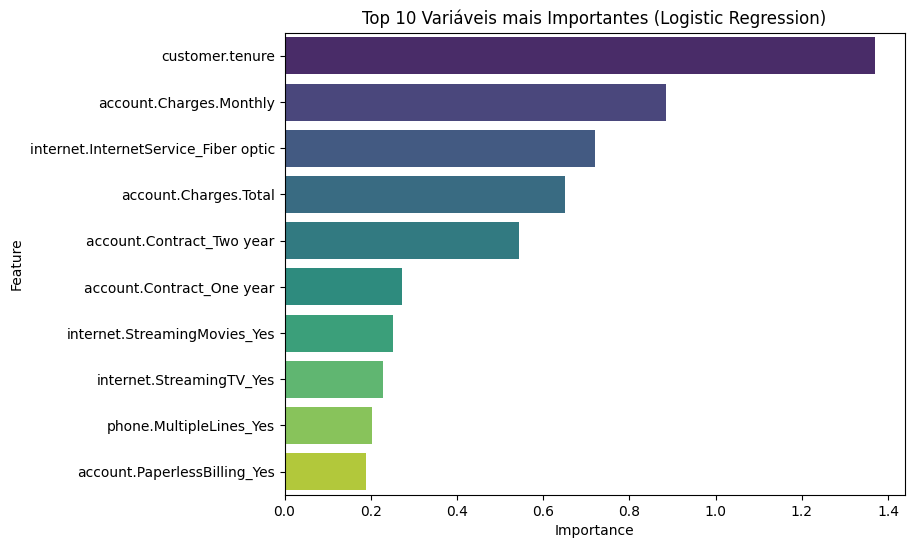


--- Top 10 Variáveis - Random Forest ---


,Feature,Importance
3,account.Charges.Total,0.196160
2,account.Charges.Monthly,0.172604
1,customer.tenure,0.166648
28,account.PaymentMethod_Electronic check,0.037858
10,internet.InternetService_Fiber optic,0.037012
4,customer.gender_Male,0.030186
13,internet.OnlineSecurity_Yes,0.026718
25,account.Contract_Two year,0.026126
26,account.PaperlessBilling_Yes,0.025419
19,internet.TechSupport_Yes,0.024333


/tmp/ipython-input-428964464.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_rf.head(10), palette='viridis')


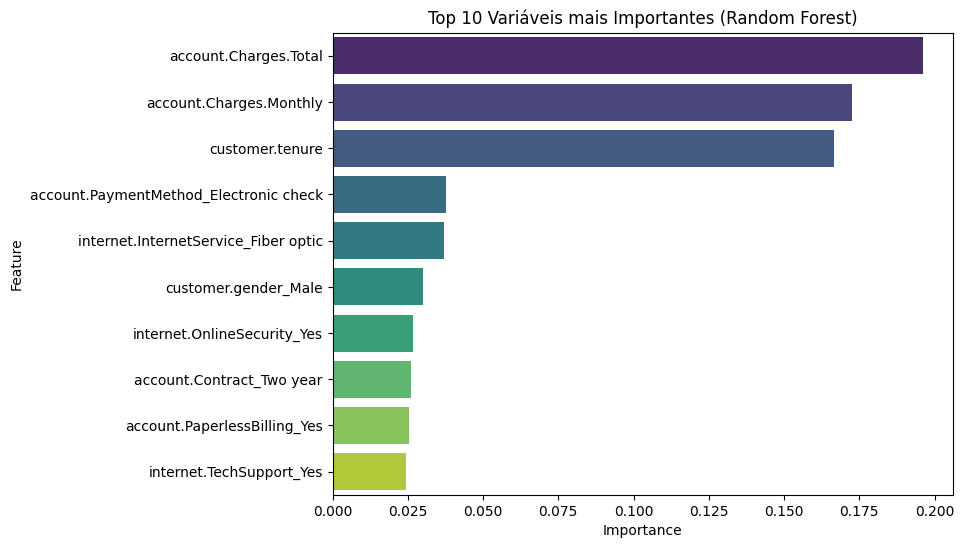


--- Top 10 Variáveis - SVM (Não Linear, via Permutation Importance) ---


,Feature,Importance
10,internet.InternetService_Fiber optic,0.022788
1,customer.tenure,0.020083
3,account.Charges.Total,0.016919
24,account.Contract_One year,0.008391
19,internet.TechSupport_Yes,0.003439
27,account.PaymentMethod_Credit card (automatic),0.002889
15,internet.OnlineBackup_Yes,0.002751
13,internet.OnlineSecurity_Yes,0.001605
21,internet.StreamingTV_Yes,0.001330
26,account.PaperlessBilling_Yes,0.001146


/tmp/ipython-input-428964464.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_svm.head(10), palette='viridis')


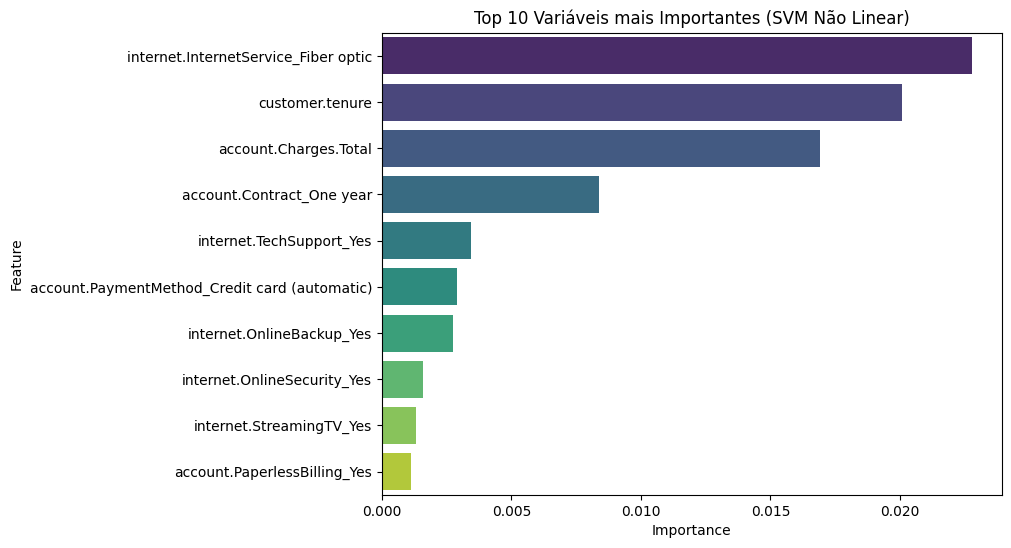


--- Top 10 Variáveis - KNN (Permutation Importance) ---


,Feature,Importance
3,account.Charges.Total,0.007840
1,customer.tenure,0.007199
15,internet.OnlineBackup_Yes,0.006098
24,account.Contract_One year,0.005823
27,account.PaymentMethod_Credit card (automatic),0.005685
19,internet.TechSupport_Yes,0.004768
13,internet.OnlineSecurity_Yes,0.004677
0,customer.SeniorCitizen,0.002659
10,internet.InternetService_Fiber optic,0.001880
26,account.PaperlessBilling_Yes,0.001651


/tmp/ipython-input-428964464.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_knn.head(10), palette='viridis')


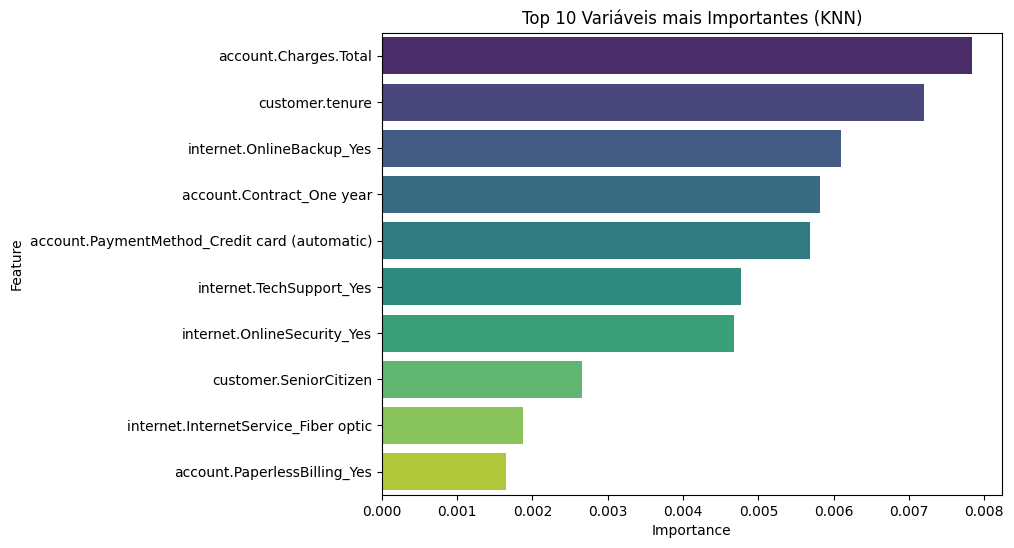

In [41]:
# --- ANÁLISE DE VARIÁVEIS POR MODELO ---

import seaborn as sns

# Regressão Logística
logistic_model = modelos["Logistic Regression"].named_steps['lr']
feature_names = X_train.columns
coefficients = logistic_model.coef_[0]

feature_importance_lr = pd.DataFrame({
    'Feature': feature_names,
    'Importance': abs(coefficients)
}).sort_values(by='Importance', ascending=False)

print("\n--- Top 10 Variáveis - Regressão Logística ---")
display(feature_importance_lr.head(10))

plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_lr.head(10), palette='viridis')
plt.title('Top 10 Variáveis mais Importantes (Logistic Regression)')
plt.show()


# Random Forest
random_forest_model = modelos["Random Forest"].named_steps['rf']
importances_rf = random_forest_model.feature_importances_

feature_importance_rf = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_rf
}).sort_values(by='Importance', ascending=False)

print("\n--- Top 10 Variáveis - Random Forest ---")
display(feature_importance_rf.head(10))

plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf.head(10), palette='viridis')
plt.title('Top 10 Variáveis mais Importantes (Random Forest)')
plt.show()


# SVM
if "SVM" in modelos:
    svm_model = modelos["SVM"].named_steps['svm']

    if hasattr(svm_model, "coef_"):  # Kernel linear
        coefs = svm_model.coef_[0]
        feature_importance_svm = pd.DataFrame({
            'Feature': feature_names,
            'Importance': abs(coefs)
        }).sort_values(by='Importance', ascending=False)

        print("\n--- Top 10 Variáveis - SVM (Linear) ---")
        display(feature_importance_svm.head(10))

        plt.figure(figsize=(8,6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_svm.head(10), palette='viridis')
        plt.title('Top 10 Variáveis mais Importantes (SVM Linear)')
        plt.show()

    else:  # Kernel não linear → usamos permutation importance
        r = permutation_importance(modelos["SVM"], X_test, y_test, n_repeats=10, random_state=42)
        feature_importance_svm = pd.DataFrame({
            'Feature': feature_names,
            'Importance': r.importances_mean
        }).sort_values(by='Importance', ascending=False)

        print("\n--- Top 10 Variáveis - SVM (Não Linear, via Permutation Importance) ---")
        display(feature_importance_svm.head(10))

        plt.figure(figsize=(8,6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_svm.head(10), palette='viridis')
        plt.title('Top 10 Variáveis mais Importantes (SVM Não Linear)')
        plt.show()



# KNN
from sklearn.inspection import permutation_importance

if "KNN" in modelos:
    knn_model = modelos["KNN"]
    r = permutation_importance(knn_model, X_test, y_test, n_repeats=10, random_state=42)
    feature_importance_knn = pd.DataFrame({
        'Feature': feature_names,
        'Importance': r.importances_mean
    }).sort_values(by='Importance', ascending=False)

    print("\n--- Top 10 Variáveis - KNN (Permutation Importance) ---")
    display(feature_importance_knn.head(10))

    plt.figure(figsize=(8,6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_knn.head(10), palette='viridis')
    plt.title('Top 10 Variáveis mais Importantes (KNN)')
    plt.show()


### INTERPRETAÇÃO E CONCLUSÕES

A análise de variáveis mostrou que alguns fatores se destacaram de forma consistente entre os modelos, especialmente em **Regressão Logística** e **Random Forest**, que apontaram variáveis como `tenure` (tempo de contrato), `MonthlyCharges` (valor mensal) e tipo de contrato como as mais impactantes na previsão de evasão. O modelo **SVM Linear**, quando aplicável, também reforçou esses padrões, enquanto o **KNN**, avaliado com Permutation Importance, indicou influência semelhante, ainda que de forma menos interpretável.

Comparando os resultados, a **Regressão Logística** apresentou melhor equilíbrio entre desempenho e interpretabilidade, com F1-score superior e ausência de overfitting. O **Random Forest** ofereceu bom poder preditivo, mas com sinais de overfitting, exigindo ajustes. O **KNN** foi menos robusto e o **SVM** apresentou limitações de interpretação dependendo do kernel utilizado.

Em termos de negócio, os principais fatores de evasão estão associados a **clientes com contratos mais curtos, valores mensais elevados e menor tempo de vínculo**, sugerindo maior risco de churn. Como estratégia de retenção, recomenda-se oferecer **descontos progressivos, benefícios em contratos de longo prazo e acompanhamento personalizado para novos clientes**.

Assim, conclui-se que a combinação de modelos permite identificar variáveis críticas e propor ações práticas de retenção, sendo a Regressão Logística o modelo mais adequado neste contexto pela sua interpretabilidade e desempenho.
